<a href="https://colab.research.google.com/github/elooo3/Automobile-Dataset/blob/main/Ope_Auto%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Opeoluwa Obembe
## Date: 8th of December 2020
### Project: Automobile Dataset
##### Project Type : Regression
#### Project Aim: Predict Car Price using provided attributes

In [128]:
# import libraries
!pip install category-encoders
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import category_encoders as ce

%matplotlib inline

plt.rcParams['figure.figsize'] = (20,10) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("Installtion completed successfully!")

Installtion completed successfully!


In [129]:
# Import dataset and print first 10 rows
dataset = pd.read_csv('imports-85.data',header = None,  sep = ',')
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [130]:
# Add column names as they are missing from raw data

columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                'drive-wheels', 'engine-location', 'wheel-base','length', 'width', 'height',
                'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system',
                'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                'highway-mpg','price']

print('Total number of columns in Automobile dataset =' , len(columns))

dataset.columns = columns
dataset.head()

Total number of columns in Automobile dataset = 26


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [131]:
# search through and replace missing values with 'NaN'
dataset.replace('?',np.NAN, inplace= True)

# check for and print total number of missing values
missing = dataset.isnull().sum().sum()
print("Total no of missing values add up to " ,missing)

Total no of missing values add up to  59


In [132]:
# Handling missing values
df = dataset.copy()

# Check for missing values in each column
df.isnull().sum()


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [133]:
# Check data types and update where necessary
#print(df.dtypes)

#we don't want missing values in target variable and since only few missing values, drop them
df.dropna(subset=['price'], axis = 0, inplace= True)

# Ensure proper dataypes
df[['bore','stroke', 'horsepower','peak-rpm']] = df[['bore','stroke','horsepower','peak-rpm']].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['price'] = df['price'].astype('int')
print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [134]:
# Split numerical and categorical columns in dataframe
numerical_col = df.select_dtypes(include = ['float','int']).columns
categorical_col = [col  for col in df.columns if df[col].dtype == "object"]

print('Categorical Columns: ',categorical_col)
#print('-'*50)
print('\n Numerical Columns: ',numerical_col)

Categorical Columns:  ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

 Numerical Columns:  Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [135]:
# Handling missing values in the numerical columns
for col in numerical_col:
    df[col].fillna(df[col].mean(), inplace = True)

# Handling missing values in the categorical columns
for col in categorical_col:
    df[col].fillna(df[col].mode()[0], inplace = True)

# Check that there are no more missing values 
print("Total number of  missing vaues in updated dataset is :" , df.isnull().sum().sum())

Total number of  missing vaues in updated dataset is : 0


In [136]:
df.to_csv('CleanAuto.csv')

##Exploratory Data Analysis

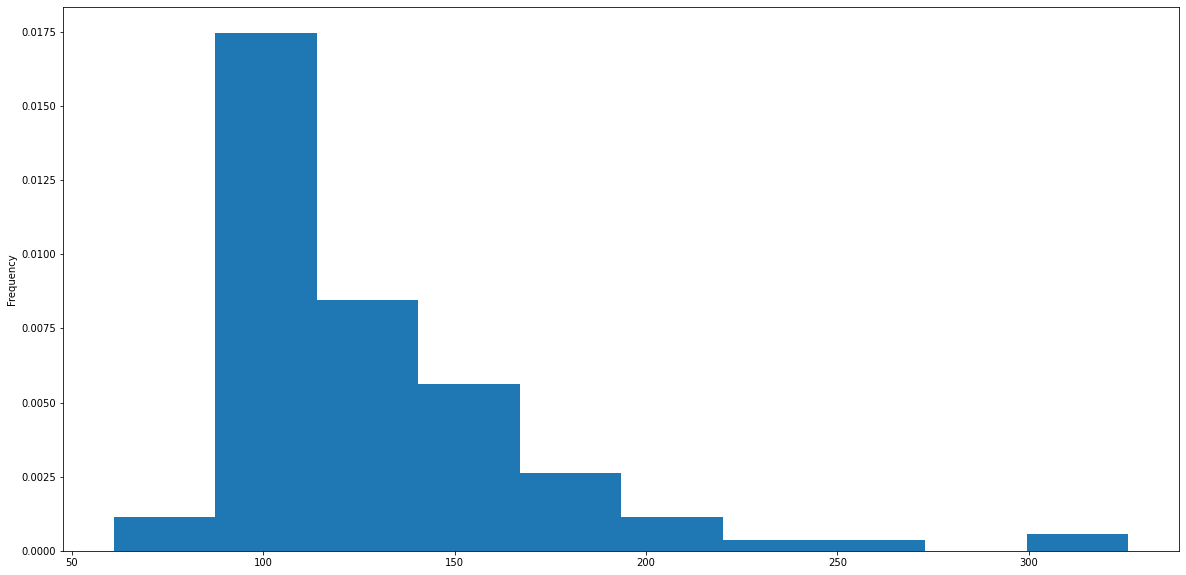

In [137]:
## Maximum Likelihood Estimation

#create a histogram to see how the engine-size data seems to be distributed
df['engine-size'].plot.hist(density=True)


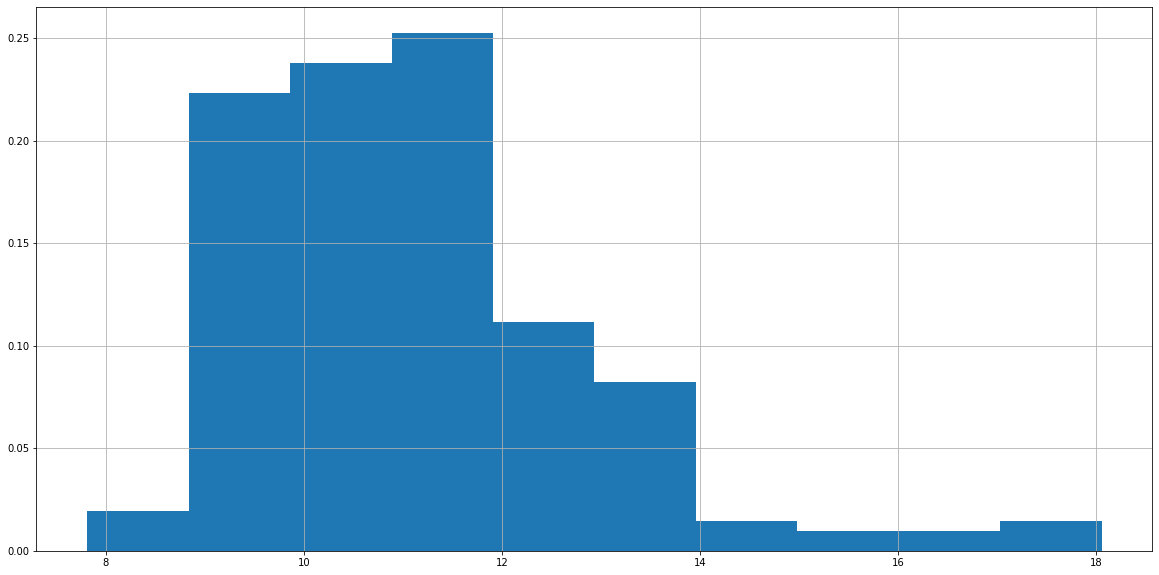

In [138]:
# engine size is not normally distributed, Try to make normal by using square root values
sqrt_engSize = np.sqrt(df['engine-size'])
sqrt_engSize = sqrt_engSize.sort_values()
sqrt_engSize.hist(density=True)

In [139]:
# use MLE to find the parameters (mu and sigma) of the normal distribution that would best describe transformed data
from scipy.stats import norm

mu, sigma = norm.fit(sqrt_engSize)
print(mu, sigma)

11.138608712150505 1.6754157239778287


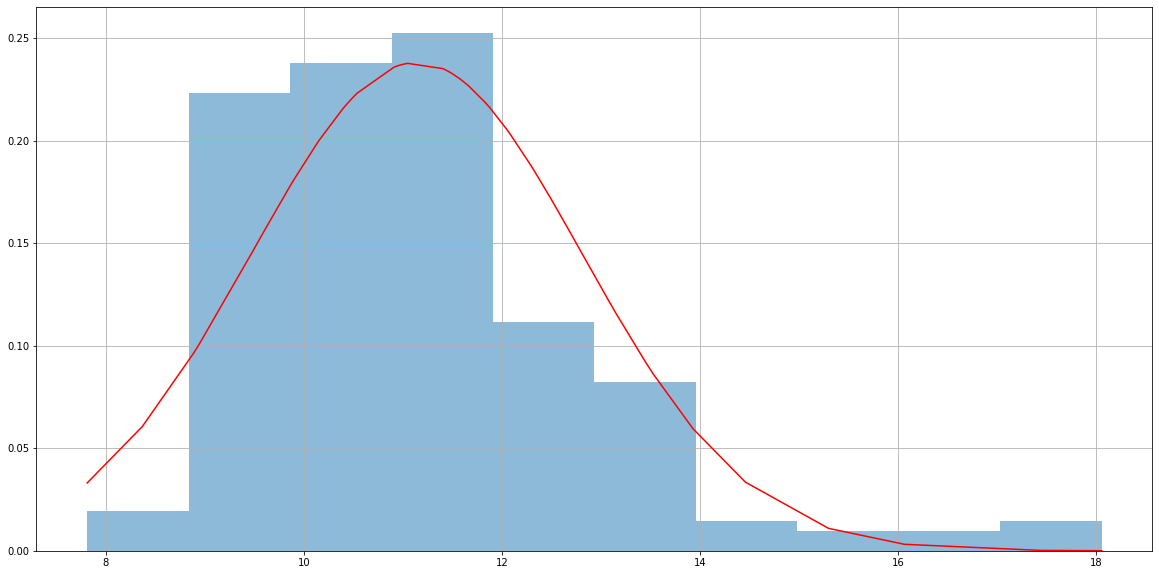

In [140]:
# get the probability density function parametrised by our estimated parameters
sqrt_engSize_normal = norm.pdf(sqrt_engSize, loc=mu, scale=sigma)

sqrt_engSize.hist(density=True, alpha=0.5)
plt.plot(sqrt_engSize, sqrt_engSize_normal, color='red')

In [141]:
# Summarize basic statistics of the dataframe
df.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,174.200995,65.889055,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,12.322175,2.101471,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.800000,64.100000,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.500000,66.600000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


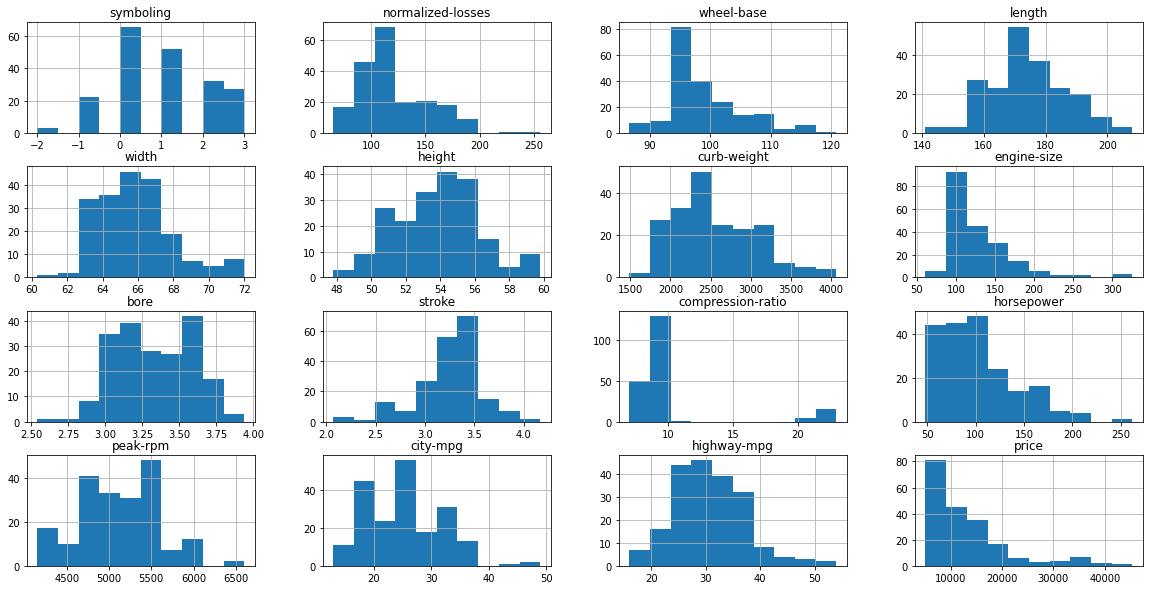

In [142]:
# Visualize histogram of dataset
df.hist(figsize= (20,10), bins= 10)
plt.show()

In [143]:
for column in df[numerical_col].columns:
    print(column)
    print("skewness:", df[column].skew())
    print("kurtosis:", df[column].kurtosis())
    print('\n')

symboling
skewness: 0.19737036029756264
kurtosis: -0.7071776171630866


normalized-losses
skewness: 0.8465463512727495
kurtosis: 1.319067556644609


wheel-base
skewness: 1.0312614426719533
kurtosis: 0.948445096054463


length
skewness: 0.15444635183586677
kurtosis: -0.06519162777008303


width
skewness: 0.8750290419412816
kurtosis: 0.6786551692228984


height
skewness: 0.029173299149270183
kurtosis: -0.4329081504305292


curb-weight
skewness: 0.7058035875297635
kurtosis: 0.034915576048686336


engine-size
skewness: 1.9791441966363523
kurtosis: 5.497490766643349


bore
skewness: -0.032946155593633106
kurtosis: -0.7981824583683212


stroke
skewness: -0.7006789884680729
kurtosis: 2.13013122019491


compression-ratio
skewness: 2.5844624326120726
kurtosis: 5.068872476264779


horsepower
skewness: 1.1472194853539708
kurtosis: 1.3214960007338394


peak-rpm
skewness: 0.10826107052388645
kurtosis: 0.10763874032826992


city-mpg
skewness: 0.6804334707346078
kurtosis: 0.7539680878039432


highway

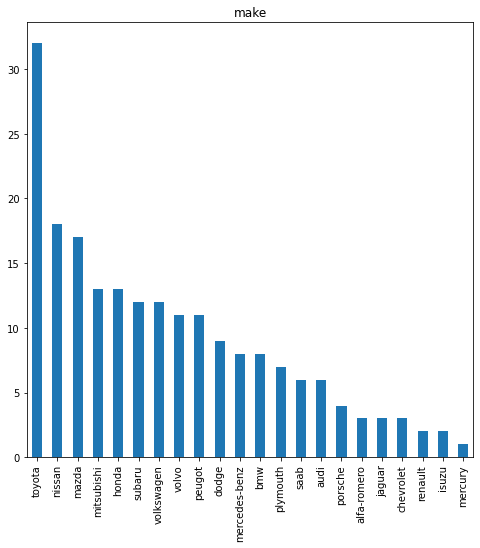

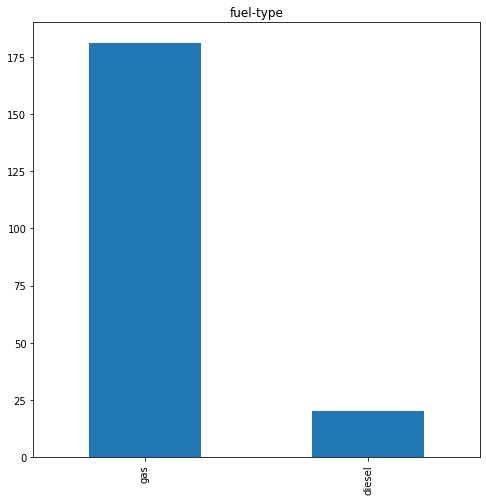

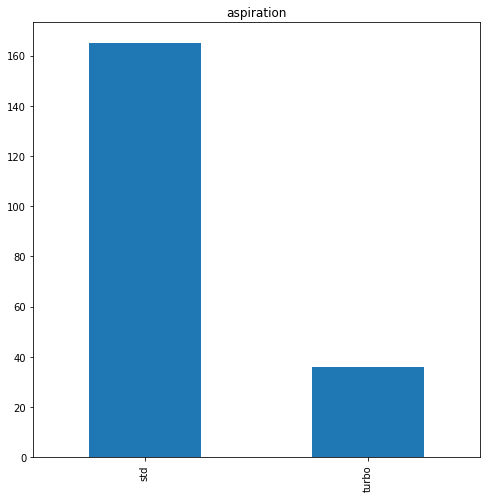

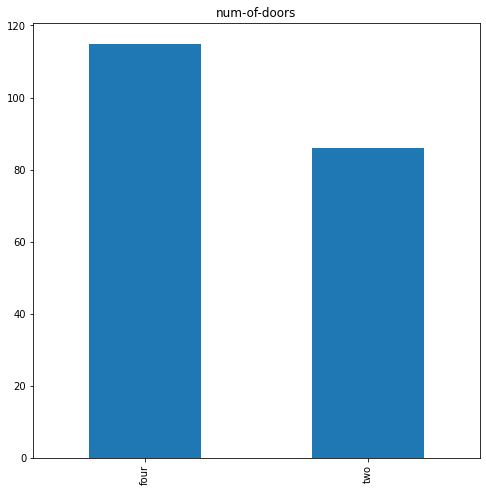

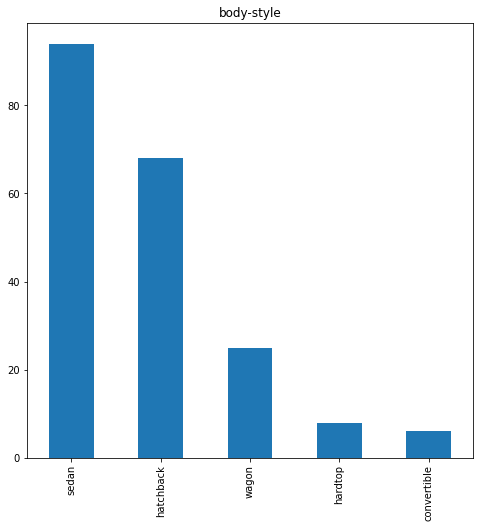

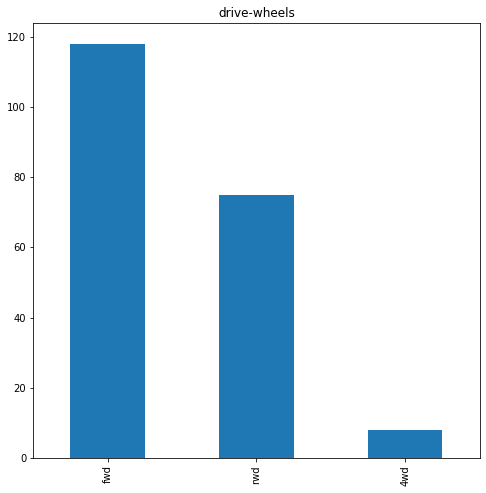

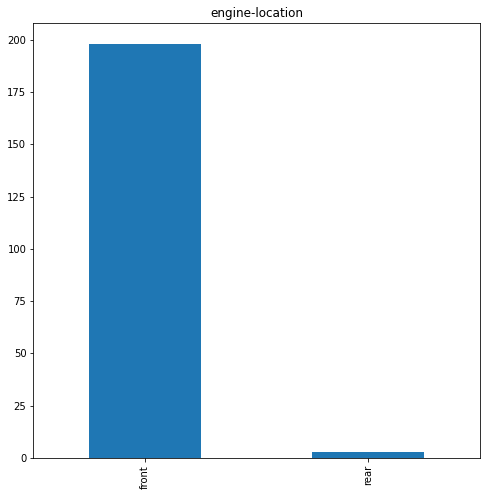

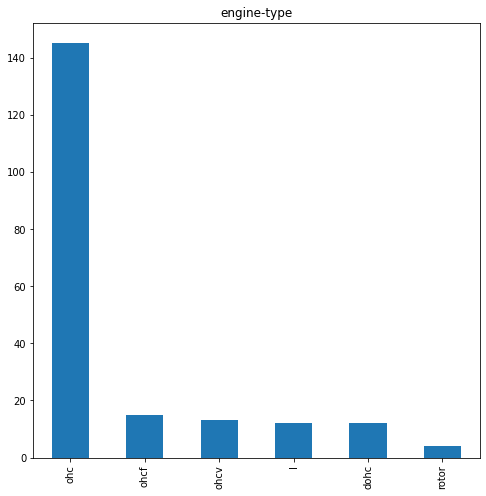

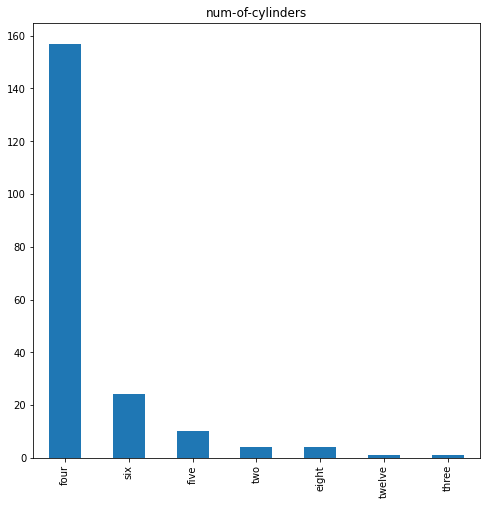

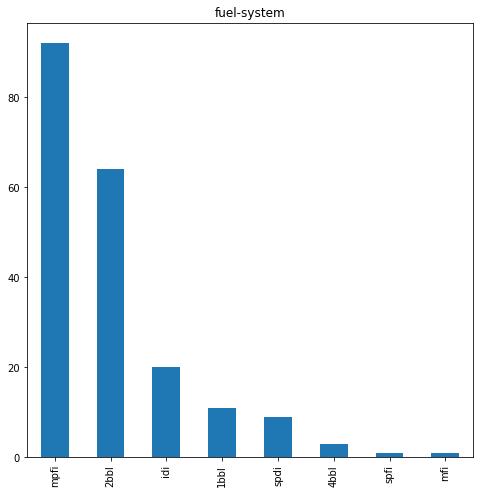

In [144]:
# visualizing categorical features using bar graphs
normal_figure = (8, 8)
for column in df[categorical_col].columns:
  df[column].value_counts().plot.bar(figsize=normal_figure, title= column)
  plt.show()

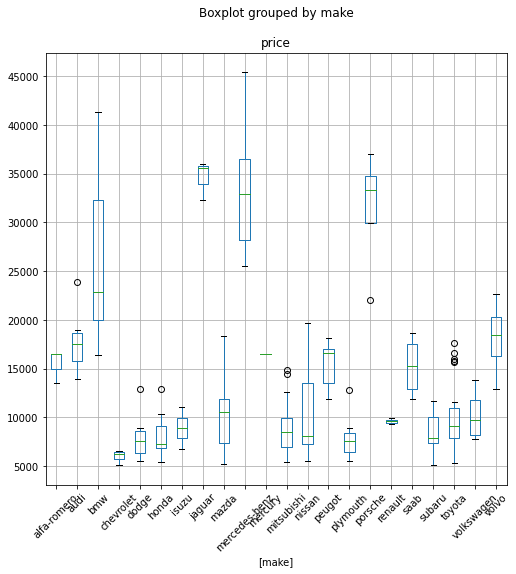

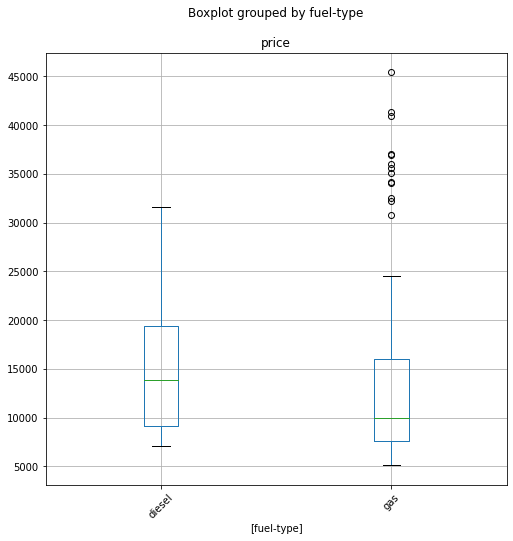

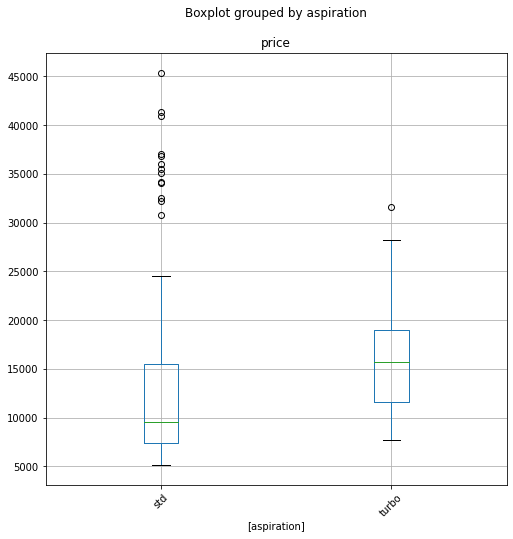

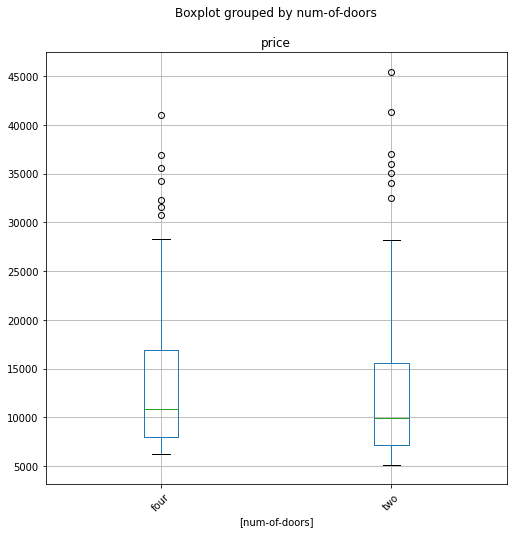

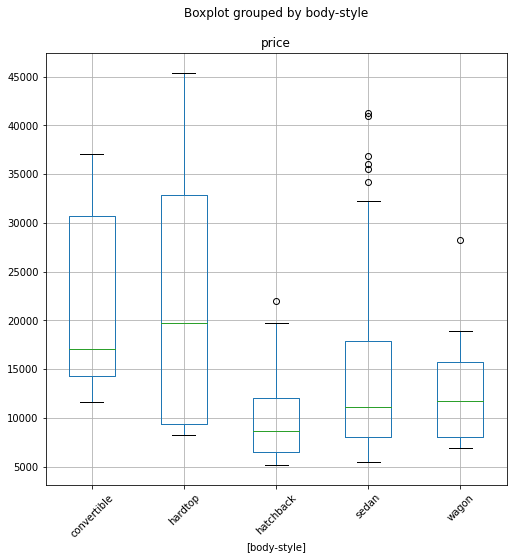

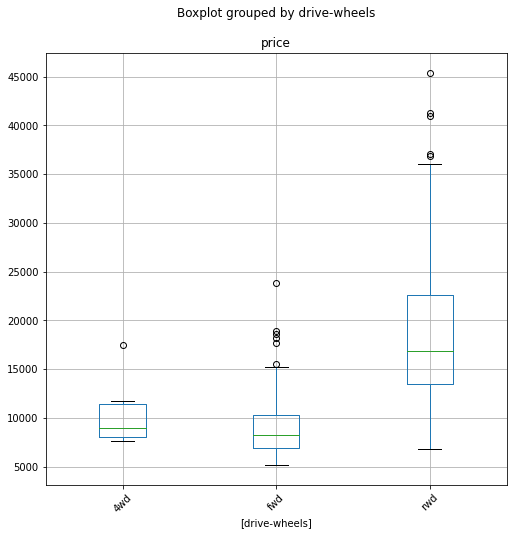

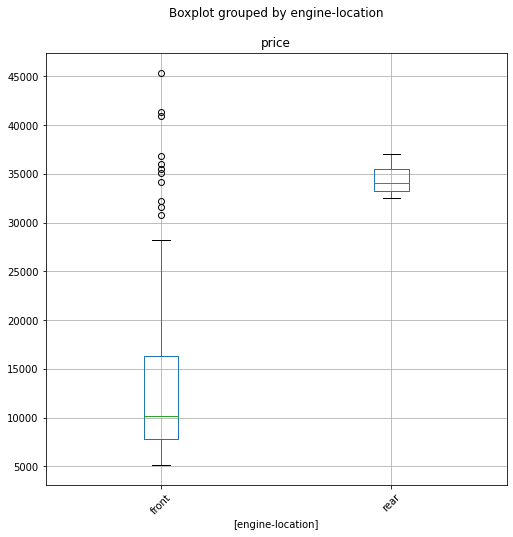

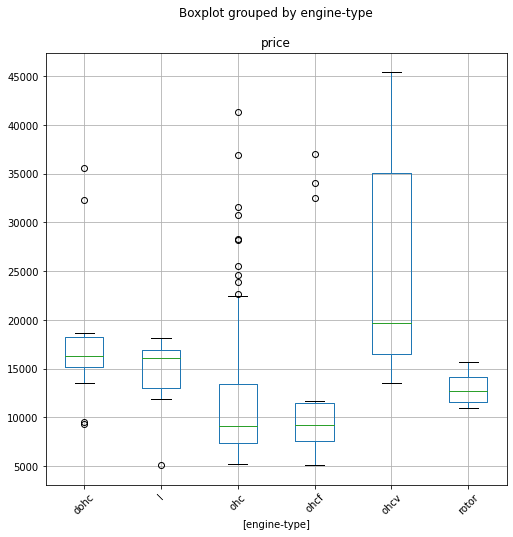

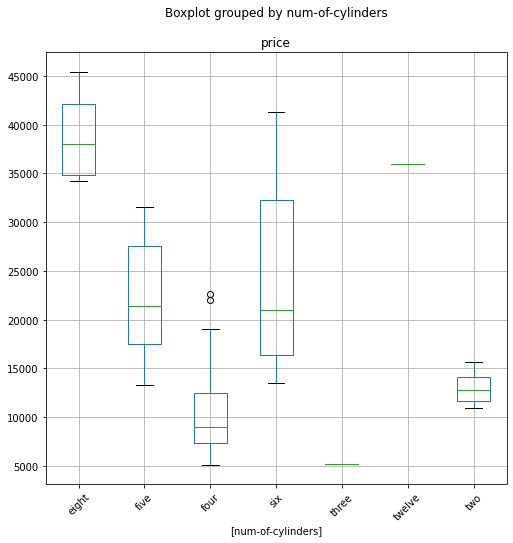

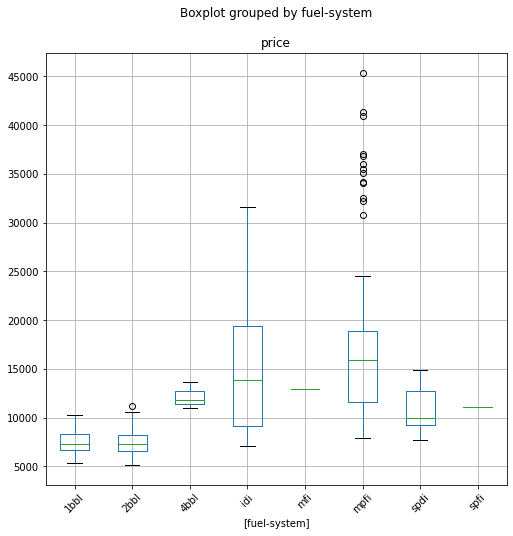

In [145]:
# visualizing categorical features using box plots
normal_figure = (8, 8)
for column in df[categorical_col].columns:
  df[[column, 'price']].boxplot(by= column, rot=45, figsize=normal_figure)
  plt.show()

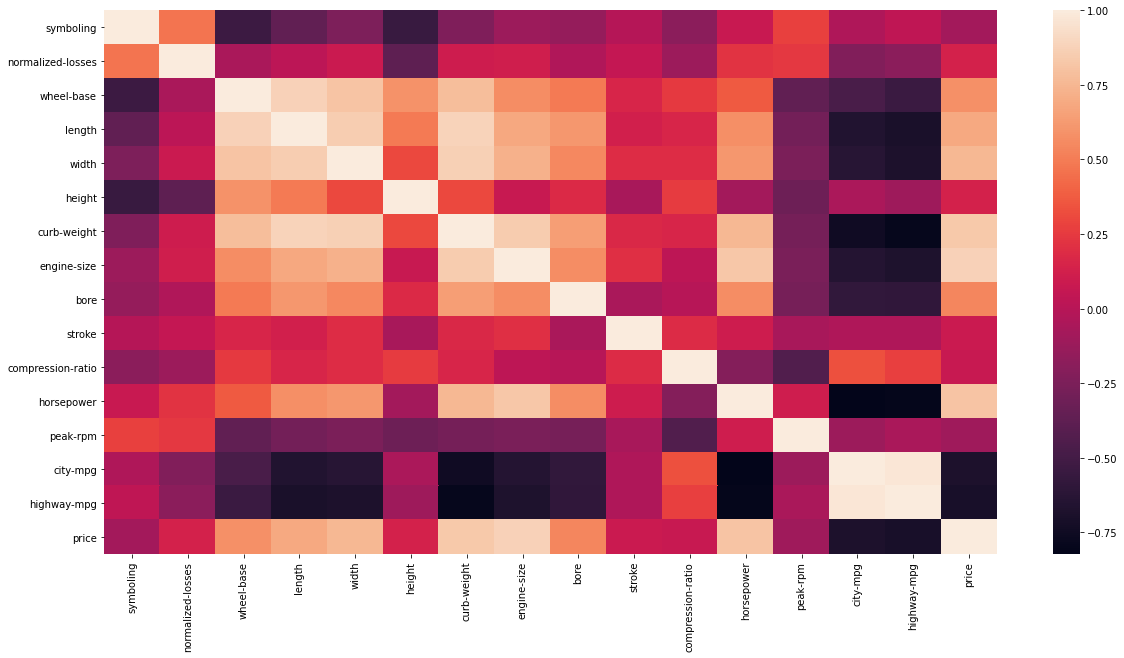

In [146]:
# Examine correlation matrix
corr_matrix = df.corr()
corr = sea.heatmap(corr_matrix )

In [147]:
# Check for correlation between variables
df.corr(method = 'spearman')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.483960,-0.542030,-0.404203,-0.260553,-0.529907,-0.260517,-0.181819,-0.178442,-0.015937,0.020986,-0.004021,0.290138,-0.021918,0.050444,-0.142683
normalized-losses,0.483960,1.000000,-0.072600,0.045926,0.117695,-0.345880,0.123187,0.124089,-0.021328,0.099416,-0.067848,0.236603,0.241301,-0.258637,-0.209499,0.202034
wheel-base,-0.542030,-0.072600,1.000000,0.913120,0.815524,0.641402,0.764638,0.645661,0.536986,0.221315,-0.119545,0.495114,-0.316128,-0.484472,-0.531121,0.681790
length,-0.404203,0.045926,0.913120,1.000000,0.889761,0.532213,0.889759,0.779691,0.639137,0.178648,-0.180277,0.660012,-0.271673,-0.661012,-0.688778,0.810331
width,-0.260553,0.117695,0.815524,0.889761,1.000000,0.370636,0.858624,0.762966,0.607031,0.236914,-0.138980,0.681364,-0.213543,-0.673376,-0.692498,0.812097
height,-0.529907,-0.345880,0.641402,0.532213,0.370636,1.000000,0.362877,0.208611,0.221354,-0.027400,0.008056,0.021625,-0.279633,-0.079883,-0.137731,0.263806
curb-weight,-0.260517,0.123187,0.764638,0.889759,0.858624,0.362877,1.000000,0.874364,0.702222,0.156648,-0.213276,0.804234,-0.247198,-0.805613,-0.830918,0.913767
engine-size,-0.181819,0.124089,0.645661,0.779691,0.762966,0.208611,0.874364,1.000000,0.696128,0.292150,-0.233197,0.818438,-0.282721,-0.722111,-0.716830,0.828417
bore,-0.178442,-0.021328,0.536986,0.639137,0.607031,0.221354,0.702222,0.696128,1.000000,-0.084952,-0.168194,0.640812,-0.304192,-0.608772,-0.620782,0.646417
stroke,-0.015937,0.099416,0.221315,0.178648,0.236914,-0.027400,0.156648,0.292150,-0.084952,1.000000,-0.055001,0.135682,-0.071172,-0.018086,-0.015152,0.112829


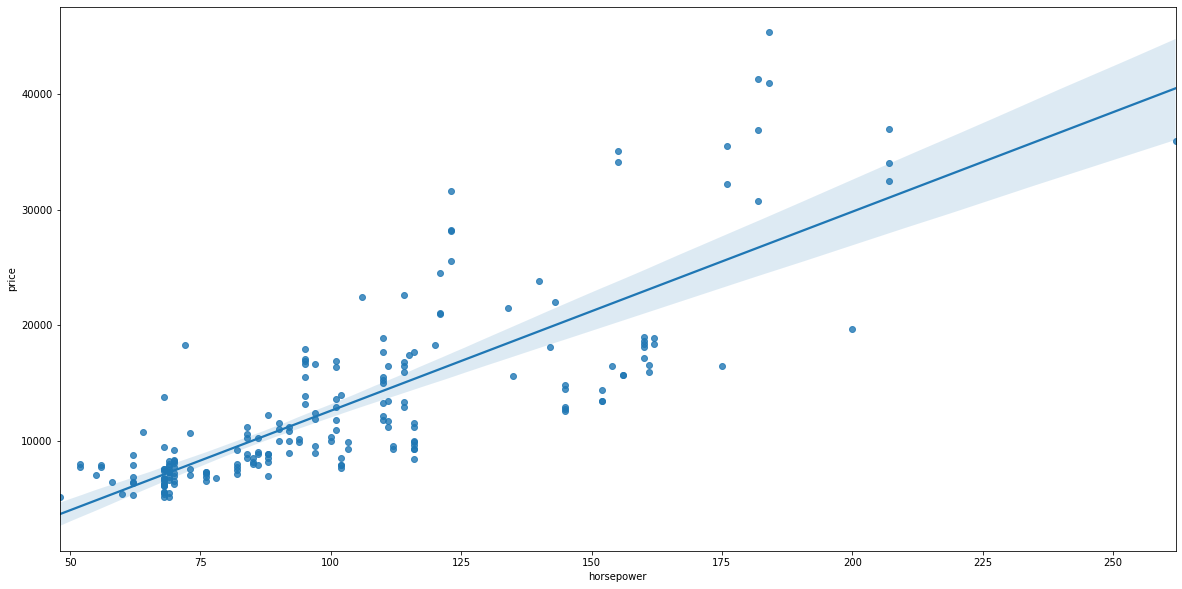

In [148]:
# regression plot of horsepower
sea.regplot(x = 'horsepower', y = 'price', data = df)
plt.show()

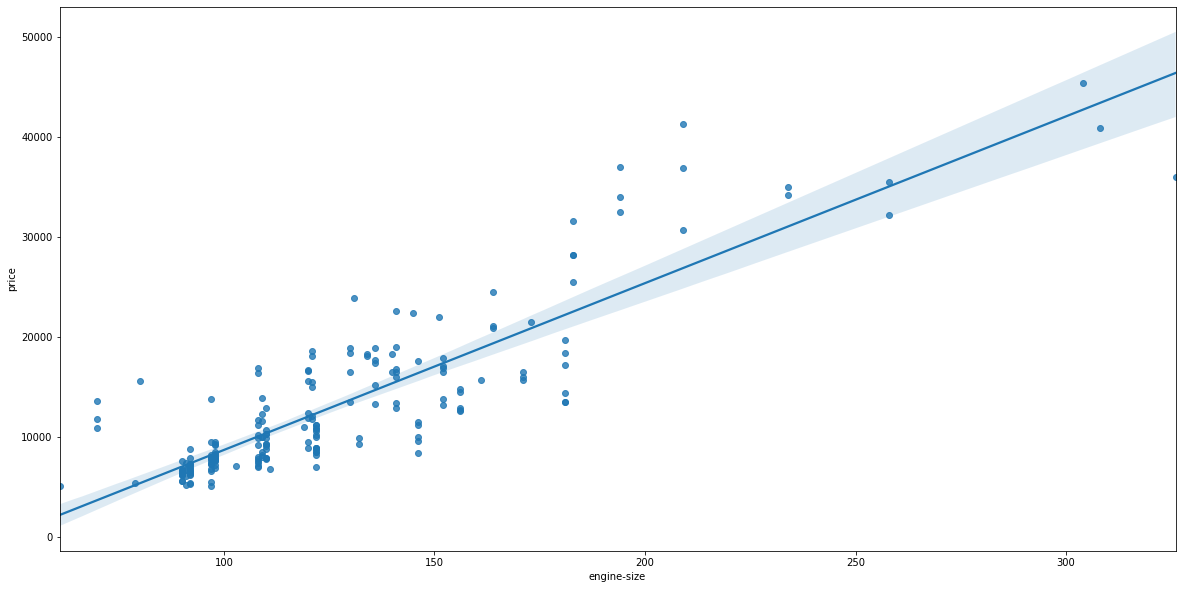

In [149]:
# regression plot of horsepower
sea.regplot(x = 'engine-size', y = 'price', data = df)
plt.show()

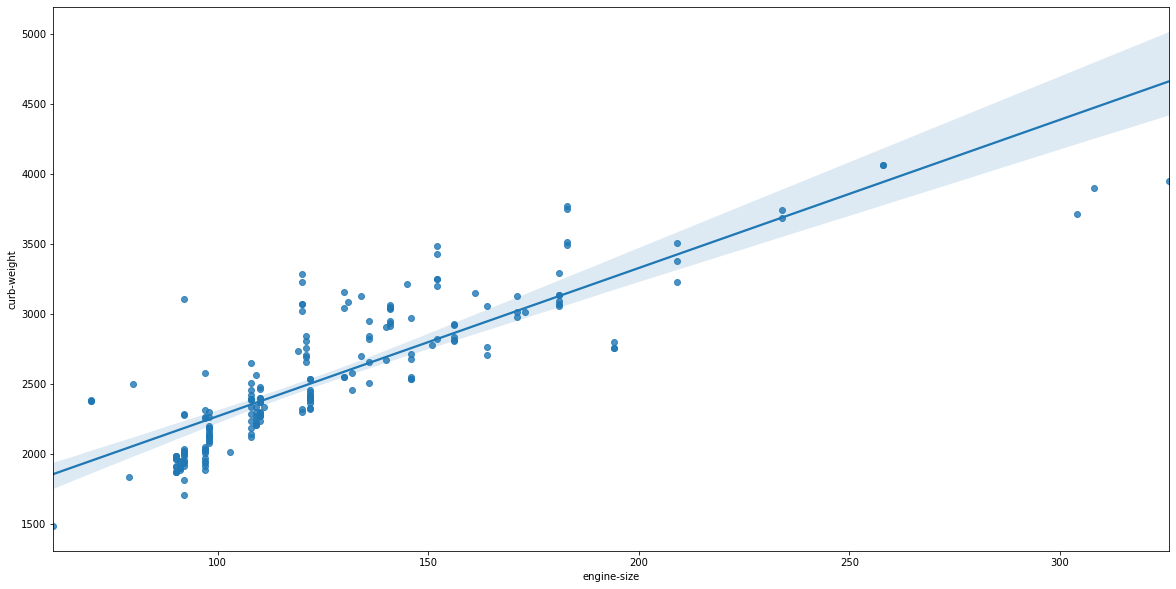

In [150]:
# regression plot of horsepower
sea.regplot(x = 'engine-size', y = 'curb-weight', data = df)
plt.show()


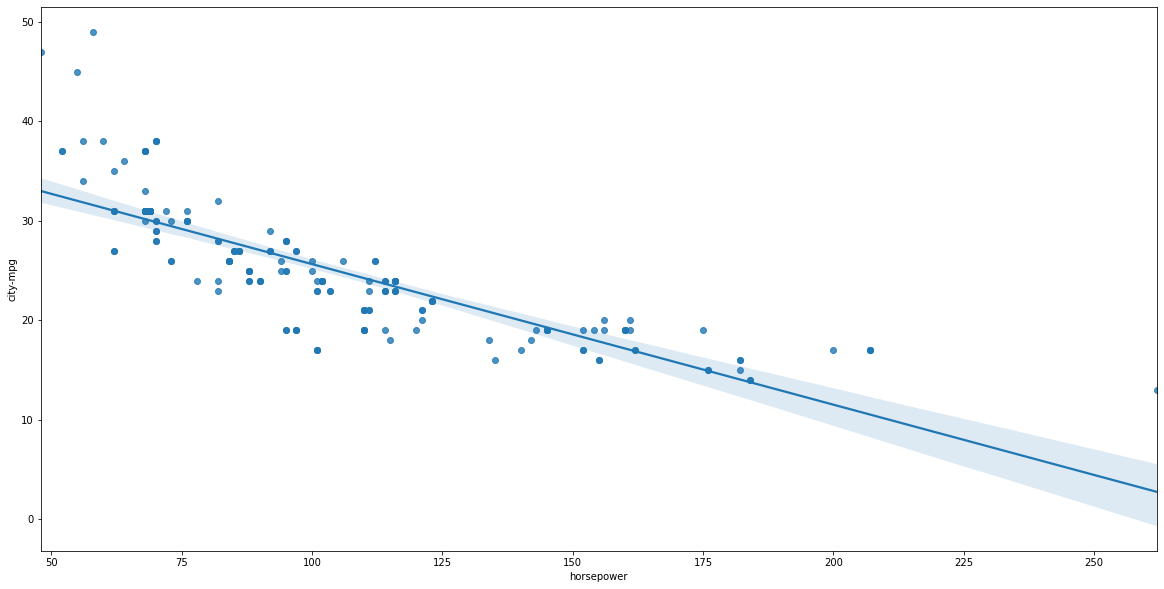

In [151]:
# regression plot of horsepower
sea.regplot(x = 'horsepower', y = 'city-mpg', data = df)
plt.show()

In [152]:
df_group = df[['body-style', 'make', 'price']]
#df_table = df_group.groupby(['num-of-cylinders', 'make'], as_index = False).mean()
df_table = df_group.groupby(['make', 'body-style'], as_index = False).mean()
df_finalPivot = df_table.pivot(index = 'make', columns = 'body-style')
df_finalPivot 

price                ...                            
body-style    convertible       hardtop  ...         sedan         wagon
make                                     ...                            
alfa-romero       14997.5           NaN  ...           NaN           NaN
audi                  NaN           NaN  ...  17647.000000  18920.000000
bmw                   NaN           NaN  ...  26118.750000           NaN
chevrolet             NaN           NaN  ...   6575.000000           NaN
dodge                 NaN           NaN  ...   7619.666667   8921.000000
honda                 NaN           NaN  ...   9945.000000   7295.000000
isuzu                 NaN           NaN  ...   6785.000000           NaN
jaguar                NaN           NaN  ...  34600.000000           NaN
mazda                 NaN           NaN  ...  11464.142857           NaN
mercedes-benz     35056.0  36788.000000  ...  33074.000000  28248.000000
mercury               NaN           NaN  ...           NaN           NaN
mitsubishi            NaN           NaN  ...   8434.000000           NaN
nissan                NaN   8249.000000  ...   8604.555556   9915.666667
peugot                NaN           NaN  ...  15758.571429  15017.500000
plymouth              NaN           NaN  ...   7150.500000   8921.000000
porsche           37028.0  33278.000000  ...           NaN           NaN
renault               NaN           NaN  ...           NaN   9295.000000
saab                  NaN           NaN  ...  15433.333333           NaN
subaru                NaN           NaN  ...   9070.600000   9342.000000
toyota            17669.0   9762.333333  ...   9542.200000   9836.000000
volkswagen        11595.0           NaN  ...   9673.888889  12290.000000
volvo                 NaN           NaN  ...  18726.875000  16293.333333

[22 rows x 5 columns]

In [153]:
annova_testMake  = df[['make', 'price']].groupby(['make'])
annova_testMake.head()

,make,price
0,alfa-romero,13495
1,alfa-romero,16500
2,alfa-romero,16500
3,audi,13950
4,audi,17450
...,...,...
194,volvo,12940
195,volvo,13415
196,volvo,15985
197,volvo,16515


In [154]:
annova_testMake.get_group('audi')['price'].mean()

17859.166666666668

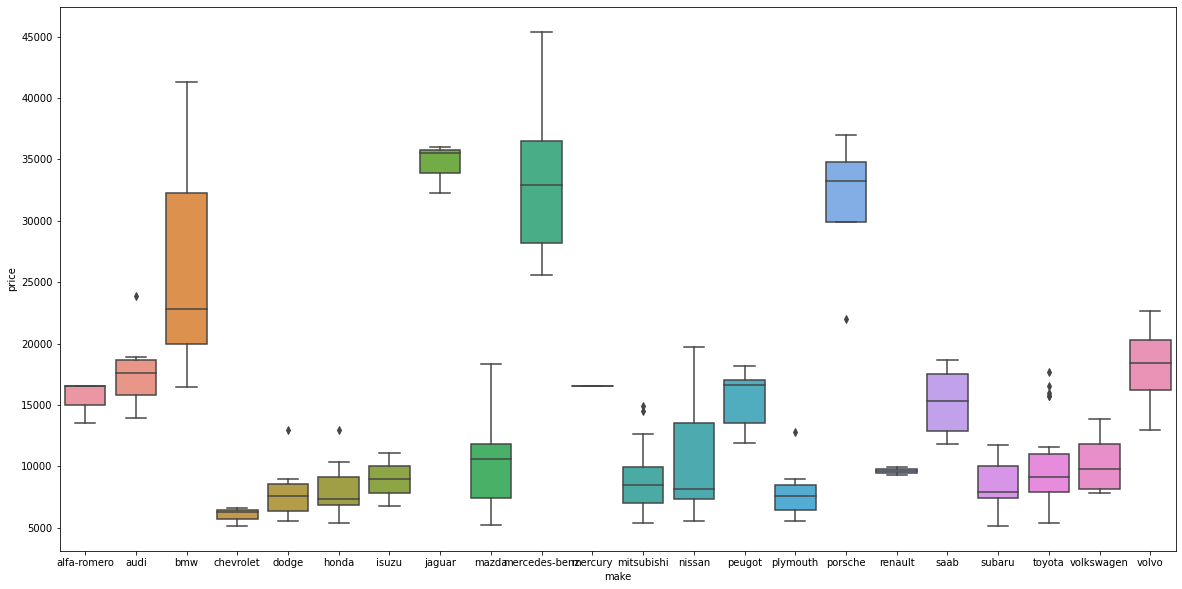

In [155]:
from scipy import stats
sea.boxplot(x= 'make', y = 'price', data = df)

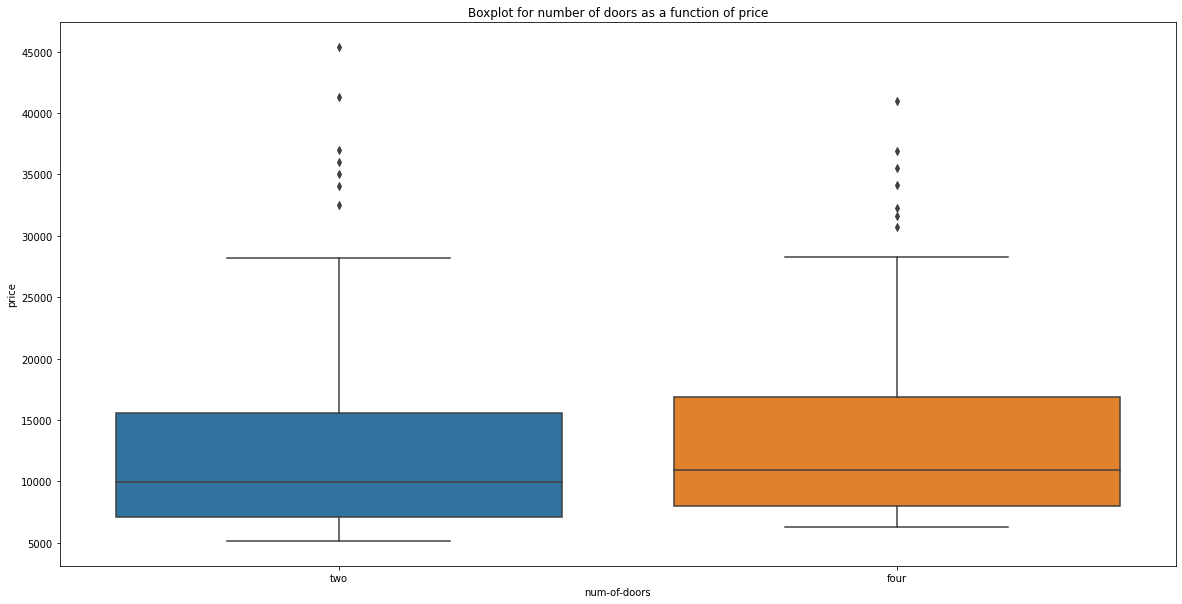

In [156]:
# Boxplot for number of doors

sea.boxplot(x = "num-of-doors", y = 'price', data = df)
plt.title("Boxplot for number of doors as a function of price")
plt.show()

In [158]:
grouped_doors = df[['num-of-doors', 'price']]. groupby(['num-of-doors'])
grouped_doors.head()

# ANOVA Test
f_val, p_val = scipy.stats.f_oneway(grouped_doors.get_group('two')['price'], grouped_doors.get_group('four')['price'])

print("ANOVA results for num-of-doors: F =", f_val, "P = ", p_val)

ANOVA results for num-of-doors: F = 0.3589973711707057 P =  0.5497450927348373


### Feature Engineering
### Using 9 features

In [107]:
# Encode categorical data using label Encoder
df_Enc = df.copy()
from sklearn.preprocessing import LabelEncoder
Enc = LabelEncoder()
df_Enc[categorical_col] = df_Enc[categorical_col].apply(Enc.fit_transform)

df_Enc.to_csv('LabelEncClean.csv')
df_Enc.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [108]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(df_Enc))
zscore

# remove all data with outliers
df2 = df_Enc
df2 = df2[(zscore <3).all(axis = 1)]
print("Shape of the original dataframe is :", df_Enc.shape)
print("Shape of the clean dataframe is :", df.shape)

del_entries = df_Enc.shape[0] - df2.shape[0]
print("Entries deleted in the dataframe are :",  del_entries)

Shape of the original dataframe is : (201, 26)
Shape of the clean dataframe is : (201, 26)
Entries deleted in the dataframe are : 47


### Feature Selection

In [109]:
#  Split data into atrributes and target variables
# where, x1 = attributes and y1 = target (price) 
x1 = df2.iloc[:, :-1] # dataframe
y1 = df2.iloc[:,-1] 
print(x1.shape)
print(y1.shape)


(154, 25)
(154,)


In [110]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x1_train, x1_valid, y1_train, y1_valid = train_test_split(x1, y1, test_size = 0.20, random_state = 1)
print(x1_train.shape)
print(x1_valid.shape)
print(y1_train.shape)
print(y1_valid.shape)

(123, 25)
(31, 25)
(123,)
(31,)


In [111]:
# Feature Selection to select top best 9 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 9 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 9)
Xtrain_new = selector_fclass.fit_transform(x1_train, y1_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x1_train.index,
                                 columns=x1.columns)
selected_features_fclass.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.7,157.3,63.8,0.0,1967.0,0.0,0.0,90.0,0.0,2.97,0.0,0.0,68.0,0.0,31.0,38.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.7,158.7,63.6,0.0,2015.0,0.0,0.0,92.0,0.0,3.05,0.0,0.0,62.0,0.0,31.0,38.0
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.2,172.0,65.4,0.0,2190.0,0.0,0.0,108.0,0.0,3.62,0.0,0.0,82.0,0.0,28.0,33.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.4,184.6,66.5,0.0,3296.0,0.0,0.0,181.0,0.0,3.43,0.0,0.0,152.0,0.0,17.0,22.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.4,175.6,66.5,0.0,2326.0,0.0,0.0,122.0,0.0,3.31,0.0,0.0,92.0,0.0,29.0,34.0


In [112]:
# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x1_train[selected_columns].head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg
24,93.7,157.3,63.8,1967,90,2.97,68.0,31,38
152,95.7,158.7,63.6,2015,92,3.05,62.0,31,38
142,97.2,172.0,65.4,2190,108,3.62,82.0,28,33
102,100.4,184.6,66.5,3296,181,3.43,152.0,17,22
173,102.4,175.6,66.5,2326,122,3.31,92.0,29,34


In [113]:
# Correlation analysis using pearson correlation
corr_list = []
for column in x1_train[selected_columns].columns:
  corr_tuple = scipy.stats.pearsonr(x1_train[column], y1_train)
  corr_list.append([column, corr_tuple[0], corr_tuple[1]])

# create dataframe based on correlations
corr_df = pd.DataFrame(corr_list, columns= ["Features", "Correlation","Pvalues"])
corr_df

# Let's sort varaibles based on p-values
corr_df.sort_values(by = ['Pvalues'], inplace= True)
corr_df.reset_index(drop = True)

corr_df.head(11)

,Features,Correlation,Pvalues
3,curb-weight,0.834535,4.089831e-33
4,engine-size,0.826554,5.481766e-32
6,horsepower,0.796297,3.473727e-28
7,city-mpg,-0.781471,1.502812e-26
8,highway-mpg,-0.772483,1.282254e-25
2,width,0.772155,1.383969e-25
1,length,0.757251,3.911414e-24
0,wheel-base,0.709305,4.255850e-20
5,bore,0.475540,2.724153e-08


### Polynomial Model Regression

In [114]:
# Convert x1_train, y1_train, x1_test, y1_test into arrays
x1_train = x1_train[selected_columns].values
x1_valid = x1_valid[selected_columns].values
y1_train = y1_train.values
y1_valid = y1_valid.values

In [115]:
# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x1_poly_train = poly_reg.fit_transform(x1_train)
    x1_poly_test = poly_reg.transform(x1_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x1_poly_train, y1_train)
    y1_pred   = regressor.predict(x1_poly_test)
    y1_hat   = regressor.predict(x1_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y1_train,y1_hat))
    rmse_test = np.sqrt(mean_squared_error(y1_valid,y1_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y1_train,y1_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y1_valid,y1_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y1_valid,y1_pred))



The order of the polynomial is 1
RMSE for train set is 2546.99320608553
R2- score for tRAIN set: 0.80
RMSE for test set is 2269.9700343344143
R2- score for test set: 0.78
------------
The order of the polynomial is 2
RMSE for train set is 1198.327663441139
R2- score for tRAIN set: 0.96
RMSE for test set is 2840.1541460536464
R2- score for test set: 0.65
------------
The order of the polynomial is 3
RMSE for train set is 143.31174412108143
R2- score for tRAIN set: 1.00
RMSE for test set is 125764.2338429135
R2- score for test set: -680.08
------------
The order of the polynomial is 4
RMSE for train set is 142.2312621378281
R2- score for tRAIN set: 1.00
RMSE for test set is 577209.771254324
R2- score for test set: -14345.64
------------
The order of the polynomial is 5
RMSE for train set is 142.23128714156684
R2- score for tRAIN set: 1.00
RMSE for test set is 660942.3987170556
R2- score for test set: -18809.92
------------
The order of the polynomial is 6
RMSE for train set is 142.231489

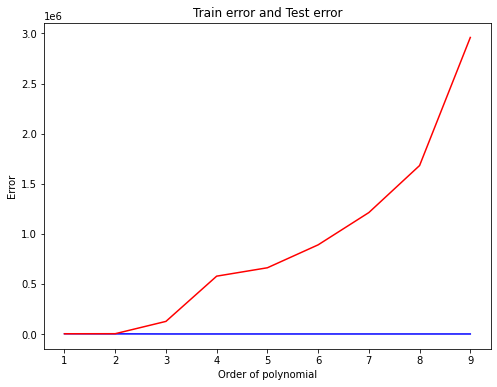

In [116]:
# Visualising the Linear Regression results
plt.plot(poly_orders, train_error, color = 'blue')
plt.plot(poly_orders, test_error, color = 'red')
plt.title('Train error and Test error')
plt.xlabel('Order of polynomial')
plt.ylabel('Error')
plt.show()

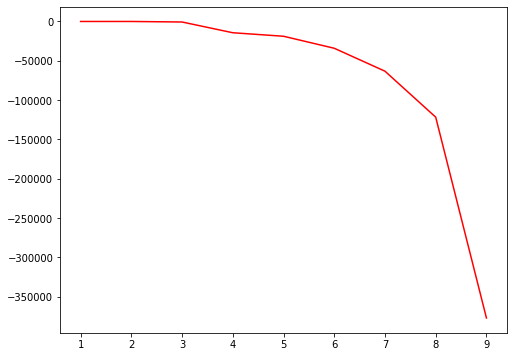

In [117]:
# Visualising the Linear Regression results
plt.plot(poly_orders, score, color = 'red')
plt.show()

### Using 7 features 

In [138]:
#  Split data into atrributes and target variables
# where, x1 = attributes and y1 = target (price) 
x2 = df2.iloc[:, :-1] # dataframe
y2 = df2.iloc[:,-1] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x2_train, x2_valid, y2_train, y2_valid = train_test_split(x2, y2, test_size = 0.20, random_state = 1)

# Feature Selection to select top best 7 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 7 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 7)
Xtrain_new = selector_fclass.fit_transform(x2_train, y2_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x2_train.index,
                                 columns=x2.columns)
selected_features_fclass.head()

# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x2_train[selected_columns].head()
x2_train


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
24,1,148.0,4,1,0,0,2,1,0,93.7,157.3,63.8,50.6,1967,2,2,90,1,2.97,3.23,9.4,68.0,5500.0,31,38
152,1,74.0,19,1,0,0,2,1,0,95.7,158.7,63.6,54.5,2015,2,2,92,1,3.05,3.03,9.0,62.0,4800.0,31,38
142,0,102.0,18,1,0,0,3,1,0,97.2,172.0,65.4,52.5,2190,3,2,108,1,3.62,2.64,9.5,82.0,4400.0,28,33
102,0,108.0,12,1,0,0,4,1,0,100.4,184.6,66.5,56.1,3296,4,3,181,5,3.43,3.27,9.0,152.0,5200.0,17,22
173,-1,65.0,19,1,0,0,3,1,0,102.4,175.6,66.5,54.9,2326,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.2,156.0,5200.0,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.0,85.0,5250.0,27,34


In [139]:
# Convert x2_train, y2_train, x2_test, y2_test into arrays
x2_train = x2_train[selected_columns].values
x2_valid = x2_valid[selected_columns].values
y2_train = y2_train.values
y2_valid = y2_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x2_poly_train = poly_reg.fit_transform(x2_train)
    x2_poly_test = poly_reg.transform(x2_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x2_poly_train, y2_train)
    y2_pred   = regressor.predict(x2_poly_test)
    y2_hat   = regressor.predict(x2_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y2_train,y2_hat))
    rmse_test = np.sqrt(mean_squared_error(y2_valid,y2_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y2_train,y2_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y2_valid,y2_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y2_valid,y2_pred))

The order of the polynomial is 1
RMSE for train set is 2687.896891144369
R2- score for tRAIN set: 0.78
RMSE for test set is 2333.5244450955665
R2- score for test set: 0.77
------------
The order of the polynomial is 2
RMSE for train set is 1711.5500766821806
R2- score for tRAIN set: 0.91
RMSE for test set is 2181.3880675193227
R2- score for test set: 0.80
------------
The order of the polynomial is 3
RMSE for train set is 153.48198205811772
R2- score for tRAIN set: 1.00
RMSE for test set is 2412829.549306055
R2- score for test set: -250688.48
------------
The order of the polynomial is 4
RMSE for train set is 142.23127579681758
R2- score for tRAIN set: 1.00
RMSE for test set is 1419090.5603206335
R2- score for test set: -86715.76
------------
The order of the polynomial is 5
RMSE for train set is 142.2317279668483
R2- score for tRAIN set: 1.00
RMSE for test set is 1217047.8965465508
R2- score for test set: -63781.01
------------
The order of the polynomial is 6
RMSE for train set is 14

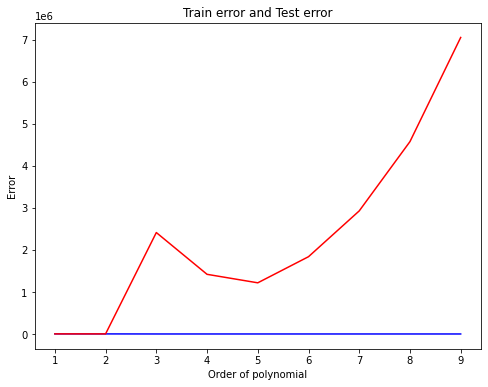

In [140]:
# Visualising the Linear Regression results
plt.plot(poly_orders, train_error, color = 'blue')
plt.plot(poly_orders, test_error, color = 'red')
plt.title('Train error and Test error')
plt.xlabel('Order of polynomial')
plt.ylabel('Error')
plt.show()

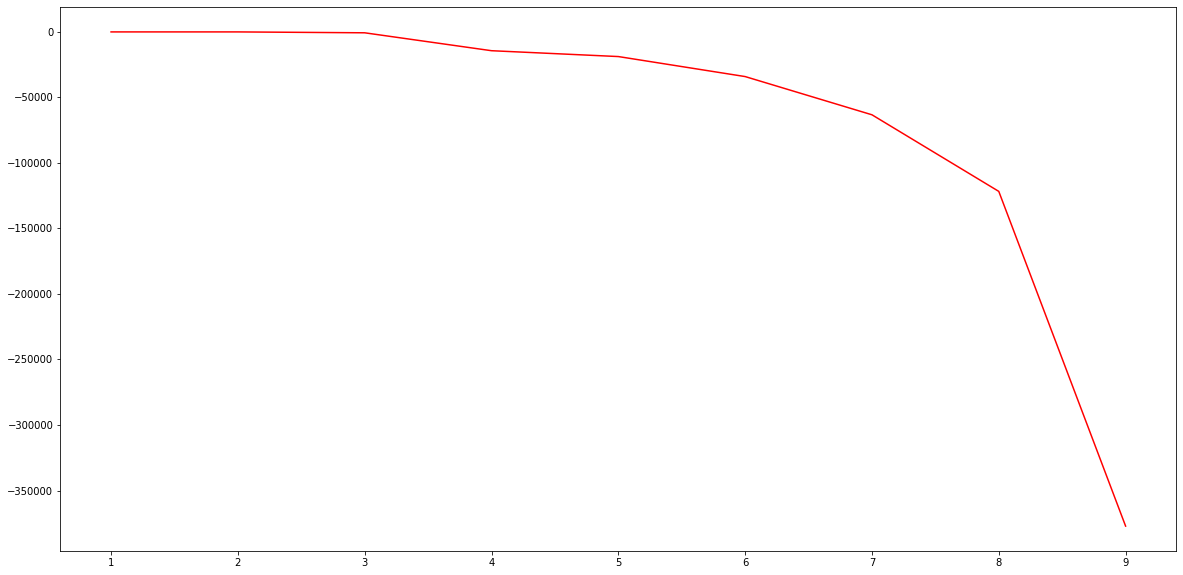

In [159]:
# Visualising the Linear Regression results
plt.plot(poly_orders, score, color = 'red')
plt.show()

### Using 5 features

In [143]:
#  Split data into atrributes and target variables
# where, x1 = attributes and y1 = target (price) 
x3 = df2.iloc[:, :-1] # dataframe
y3 = df2.iloc[:,-1] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x3_train, x3_valid, y3_train, y3_valid = train_test_split(x3, y3, test_size = 0.20, random_state = 1)

# Feature Selection to select top best 7 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 5 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 5)
Xtrain_new = selector_fclass.fit_transform(x3_train, y3_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x3_train.index,
                                 columns=x3.columns)
selected_features_fclass.head()

# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x3_train[selected_columns].head()
x3_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
24,1,148.0,4,1,0,0,2,1,0,93.7,157.3,63.8,50.6,1967,2,2,90,1,2.97,3.23,9.4,68.0,5500.0,31,38
152,1,74.0,19,1,0,0,2,1,0,95.7,158.7,63.6,54.5,2015,2,2,92,1,3.05,3.03,9.0,62.0,4800.0,31,38
142,0,102.0,18,1,0,0,3,1,0,97.2,172.0,65.4,52.5,2190,3,2,108,1,3.62,2.64,9.5,82.0,4400.0,28,33
102,0,108.0,12,1,0,0,4,1,0,100.4,184.6,66.5,56.1,3296,4,3,181,5,3.43,3.27,9.0,152.0,5200.0,17,22
173,-1,65.0,19,1,0,0,3,1,0,102.4,175.6,66.5,54.9,2326,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.2,156.0,5200.0,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.0,85.0,5250.0,27,34


In [144]:
# Convert x3_train, y3_train, x3_test, y3_test into arrays
x3_train = x3_train[selected_columns].values
x3_valid = x3_valid[selected_columns].values
y3_train = y3_train.values
y3_valid = y3_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x3_poly_train = poly_reg.fit_transform(x3_train)
    x3_poly_test = poly_reg.transform(x3_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x3_poly_train, y3_train)
    y3_pred   = regressor.predict(x3_poly_test)
    y3_hat   = regressor.predict(x3_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y3_train,y3_hat))
    rmse_test = np.sqrt(mean_squared_error(y3_valid,y3_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y3_train,y3_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y3_valid,y3_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y3_valid,y3_pred))

The order of the polynomial is 1
RMSE for train set is 2822.7303139677947
R2- score for tRAIN set: 0.76
RMSE for test set is 2003.1278109554496
R2- score for test set: 0.83
------------
The order of the polynomial is 2
RMSE for train set is 2211.088550997677
R2- score for tRAIN set: 0.85
RMSE for test set is 1767.0698154576096
R2- score for test set: 0.87
------------
The order of the polynomial is 3
RMSE for train set is 2035.5150668869871
R2- score for tRAIN set: 0.87
RMSE for test set is 4463.860645667041
R2- score for test set: 0.14
------------
The order of the polynomial is 4
RMSE for train set is 272.4587068364474
R2- score for tRAIN set: 1.00
RMSE for test set is 23063.239401744406
R2- score for test set: -21.90
------------
The order of the polynomial is 5
RMSE for train set is 696.2382465992117
R2- score for tRAIN set: 0.99
RMSE for test set is 176195.33347159126
R2- score for test set: -1335.82
------------
The order of the polynomial is 6
RMSE for train set is 719.430757322

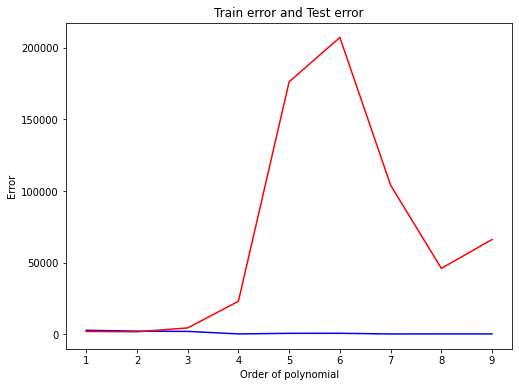

In [145]:
# Visualising the Linear Regression results
plt.plot(poly_orders, train_error, color = 'blue')
plt.plot(poly_orders, test_error, color = 'red')
plt.title('Train error and Test error')
plt.xlabel('Order of polynomial')
plt.ylabel('Error')
plt.show()

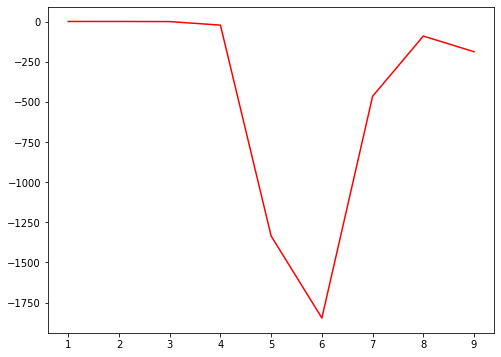

In [146]:
# Visualising the Linear Regression results
plt.plot(poly_orders, score, color = 'red')
plt.show()

#### Using 4 features

In [149]:
#  Split data into atrributes and target variables
# where, x1 = attributes and y1 = target (price) 
x4 = df2.iloc[:, :-1] # dataframe
y4 = df2.iloc[:,-1] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x4_train, x4_valid, y4_train, y4_valid = train_test_split(x4, y4, test_size = 0.20, random_state = 1)

# Feature Selection to select top best 7 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 4 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 4)
Xtrain_new = selector_fclass.fit_transform(x4_train, y4_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x4_train.index,
                                 columns=x4.columns)
selected_features_fclass.head()

# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x4_train[selected_columns].head()
x4_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
24,1,148.0,4,1,0,0,2,1,0,93.7,157.3,63.8,50.6,1967,2,2,90,1,2.97,3.23,9.4,68.0,5500.0,31,38
152,1,74.0,19,1,0,0,2,1,0,95.7,158.7,63.6,54.5,2015,2,2,92,1,3.05,3.03,9.0,62.0,4800.0,31,38
142,0,102.0,18,1,0,0,3,1,0,97.2,172.0,65.4,52.5,2190,3,2,108,1,3.62,2.64,9.5,82.0,4400.0,28,33
102,0,108.0,12,1,0,0,4,1,0,100.4,184.6,66.5,56.1,3296,4,3,181,5,3.43,3.27,9.0,152.0,5200.0,17,22
173,-1,65.0,19,1,0,0,3,1,0,102.4,175.6,66.5,54.9,2326,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.2,156.0,5200.0,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.0,85.0,5250.0,27,34


In [150]:
# Convert x4_train, y4_train, x4_test, y4_test into arrays
x4_train = x4_train[selected_columns].values
x4_valid = x4_valid[selected_columns].values
y4_train = y4_train.values
y4_valid = y4_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x4_poly_train = poly_reg.fit_transform(x4_train)
    x4_poly_test = poly_reg.transform(x4_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x4_poly_train, y4_train)
    y4_pred   = regressor.predict(x4_poly_test)
    y4_hat   = regressor.predict(x4_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y4_train,y4_hat))
    rmse_test = np.sqrt(mean_squared_error(y4_valid,y4_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y4_train,y4_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y4_valid,y4_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y4_valid,y4_pred))

The order of the polynomial is 1
RMSE for train set is 2959.5244954017385
R2- score for tRAIN set: 0.73
RMSE for test set is 2281.898800368474
R2- score for test set: 0.78
------------
The order of the polynomial is 2
RMSE for train set is 2447.7694156952534
R2- score for tRAIN set: 0.82
RMSE for test set is 2006.4649590395832
R2- score for test set: 0.83
------------
The order of the polynomial is 3
RMSE for train set is 2178.397172499475
R2- score for tRAIN set: 0.85
RMSE for test set is 2346.3375085272446
R2- score for test set: 0.76
------------
The order of the polynomial is 4
RMSE for train set is 2280.1157786664803
R2- score for tRAIN set: 0.84
RMSE for test set is 5160.483231243212
R2- score for test set: -0.15
------------
The order of the polynomial is 5
RMSE for train set is 1034.5767764348905
R2- score for tRAIN set: 0.97
RMSE for test set is 9443.55194437533
R2- score for test set: -2.84
------------
The order of the polynomial is 6
RMSE for train set is 579.1600657373008


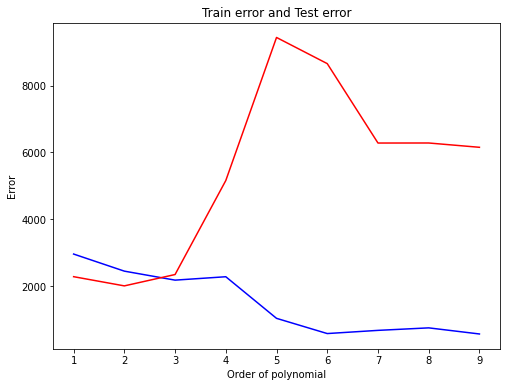

In [151]:
# Visualising the Linear Regression results
plt.plot(poly_orders, train_error, color = 'blue')
plt.plot(poly_orders, test_error, color = 'red')
plt.title('Train error and Test error')
plt.xlabel('Order of polynomial')
plt.ylabel('Error')
plt.show()

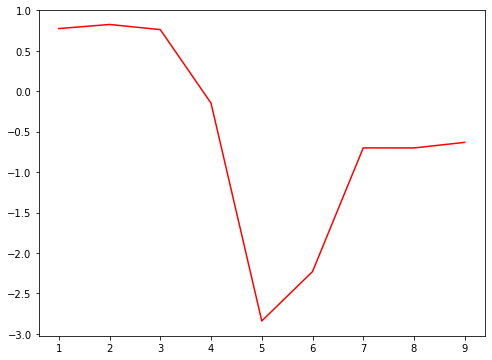

In [152]:
# Visualising the Linear Regression results
plt.plot(poly_orders, score, color = 'red')
plt.show()

###Using 3 features

In [154]:
#  Split data into atrributes and target variables
# where, x1 = attributes and y1 = target (price) 
x5 = df2.iloc[:, :-1] # dataframe
y5 = df2.iloc[:,-1] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x5_train, x5_valid, y5_train, y5_valid = train_test_split(x5, y5, test_size = 0.20, random_state = 1)

# Feature Selection to select top best 3 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 3 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 3)
Xtrain_new = selector_fclass.fit_transform(x5_train, y5_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x5_train.index,
                                 columns=x5.columns)
selected_features_fclass.head()

# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x5_train[selected_columns].head()
x5_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
24,1,148.0,4,1,0,0,2,1,0,93.7,157.3,63.8,50.6,1967,2,2,90,1,2.97,3.23,9.4,68.0,5500.0,31,38
152,1,74.0,19,1,0,0,2,1,0,95.7,158.7,63.6,54.5,2015,2,2,92,1,3.05,3.03,9.0,62.0,4800.0,31,38
142,0,102.0,18,1,0,0,3,1,0,97.2,172.0,65.4,52.5,2190,3,2,108,1,3.62,2.64,9.5,82.0,4400.0,28,33
102,0,108.0,12,1,0,0,4,1,0,100.4,184.6,66.5,56.1,3296,4,3,181,5,3.43,3.27,9.0,152.0,5200.0,17,22
173,-1,65.0,19,1,0,0,3,1,0,102.4,175.6,66.5,54.9,2326,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.2,156.0,5200.0,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.0,85.0,5250.0,27,34


In [155]:
# Convert x5_train, y5_train, x5_test, y5_test into arrays
x5_train = x5_train[selected_columns].values
x5_valid = x5_valid[selected_columns].values
y5_train = y5_train.values
y5_valid = y5_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x5_poly_train = poly_reg.fit_transform(x5_train)
    x5_poly_test = poly_reg.transform(x5_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x5_poly_train, y5_train)
    y5_pred   = regressor.predict(x5_poly_test)
    y5_hat   = regressor.predict(x5_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y5_train,y5_hat))
    rmse_test = np.sqrt(mean_squared_error(y5_valid,y5_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y5_train,y5_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y5_valid,y5_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y5_valid,y5_pred))

The order of the polynomial is 1
RMSE for train set is 2960.8165336508555
R2- score for tRAIN set: 0.73
RMSE for test set is 2288.6608492100795
R2- score for test set: 0.77
------------
The order of the polynomial is 2
RMSE for train set is 2630.5117284260673
R2- score for tRAIN set: 0.79
RMSE for test set is 2264.2643152426676
R2- score for test set: 0.78
------------
The order of the polynomial is 3
RMSE for train set is 2456.4736345992956
R2- score for tRAIN set: 0.81
RMSE for test set is 2247.6596168864303
R2- score for test set: 0.78
------------
The order of the polynomial is 4
RMSE for train set is 1858.620561908856
R2- score for tRAIN set: 0.89
RMSE for test set is 4345.6724189537745
R2- score for test set: 0.19
------------
The order of the polynomial is 5
RMSE for train set is 1339.068819227693
R2- score for tRAIN set: 0.94
RMSE for test set is 3727.8136513951767
R2- score for test set: 0.40
------------
The order of the polynomial is 6
RMSE for train set is 1451.677558682790

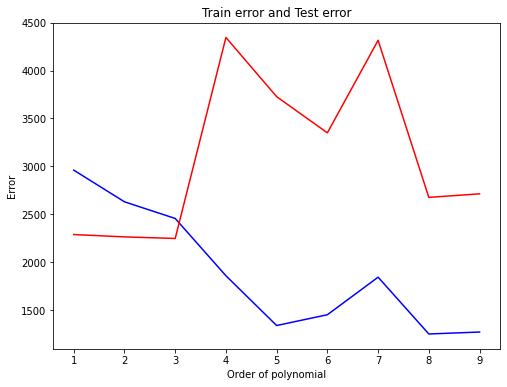

In [156]:
# Visualising the Linear Regression results
plt.plot(poly_orders, train_error, color = 'blue')
plt.plot(poly_orders, test_error, color = 'red')
plt.title('Train error and Test error')
plt.xlabel('Order of polynomial')
plt.ylabel('Error')
plt.show()

####Using 2 Features

In [158]:
#  Split data into atrributes and target variables
# where, x1 = attributes and y1 = target (price) 
x6 = df2.iloc[:, :-1] # dataframe
y6 = df2.iloc[:,-1] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x6_train, x6_valid, y6_train, y6_valid = train_test_split(x6, y6, test_size = 0.20, random_state = 1)

# Feature Selection to select top best 3 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 2 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 2)
Xtrain_new = selector_fclass.fit_transform(x6_train, y6_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x6_train.index,
                                 columns=x6.columns)
selected_features_fclass.head()

# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x6_train[selected_columns].head()
x6_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
24,1,148.0,4,1,0,0,2,1,0,93.7,157.3,63.8,50.6,1967,2,2,90,1,2.97,3.23,9.4,68.0,5500.0,31,38
152,1,74.0,19,1,0,0,2,1,0,95.7,158.7,63.6,54.5,2015,2,2,92,1,3.05,3.03,9.0,62.0,4800.0,31,38
142,0,102.0,18,1,0,0,3,1,0,97.2,172.0,65.4,52.5,2190,3,2,108,1,3.62,2.64,9.5,82.0,4400.0,28,33
102,0,108.0,12,1,0,0,4,1,0,100.4,184.6,66.5,56.1,3296,4,3,181,5,3.43,3.27,9.0,152.0,5200.0,17,22
173,-1,65.0,19,1,0,0,3,1,0,102.4,175.6,66.5,54.9,2326,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.2,156.0,5200.0,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.0,85.0,5250.0,27,34


In [159]:
# Convert x6_train, y6_train, x6_test, y6_test into arrays
x6_train = x6_train[selected_columns].values
x6_valid = x6_valid[selected_columns].values
y6_train = y6_train.values
y6_valid = y6_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x6_poly_train = poly_reg.fit_transform(x6_train)
    x6_poly_test = poly_reg.transform(x6_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x6_poly_train, y6_train)
    y6_pred   = regressor.predict(x6_poly_test)
    y6_hat   = regressor.predict(x6_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y6_train,y6_hat))
    rmse_test = np.sqrt(mean_squared_error(y6_valid,y6_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y6_train,y6_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y6_valid,y6_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y6_valid,y6_pred))

The order of the polynomial is 1
RMSE for train set is 2961.0057085692088
R2- score for tRAIN set: 0.73
RMSE for test set is 2289.4305841858013
R2- score for test set: 0.77
------------
The order of the polynomial is 2
RMSE for train set is 2646.1103479869676
R2- score for tRAIN set: 0.78
RMSE for test set is 2291.0399122041754
R2- score for test set: 0.77
------------
The order of the polynomial is 3
RMSE for train set is 2540.8003371854666
R2- score for tRAIN set: 0.80
RMSE for test set is 2365.141878862187
R2- score for test set: 0.76
------------
The order of the polynomial is 4
RMSE for train set is 2396.453416712318
R2- score for tRAIN set: 0.82
RMSE for test set is 2294.8636705405224
R2- score for test set: 0.77
------------
The order of the polynomial is 5
RMSE for train set is 2013.3236601472786
R2- score for tRAIN set: 0.88
RMSE for test set is 2181.7933430057687
R2- score for test set: 0.80
------------
The order of the polynomial is 6
RMSE for train set is 1981.281474709993

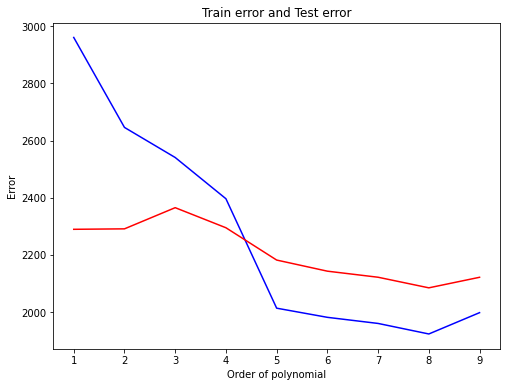

In [160]:
# Visualising the Linear Regression results
plt.plot(poly_orders, train_error, color = 'blue')
plt.plot(poly_orders, test_error, color = 'red')
plt.title('Train error and Test error')
plt.xlabel('Order of polynomial')
plt.ylabel('Error')
plt.show()

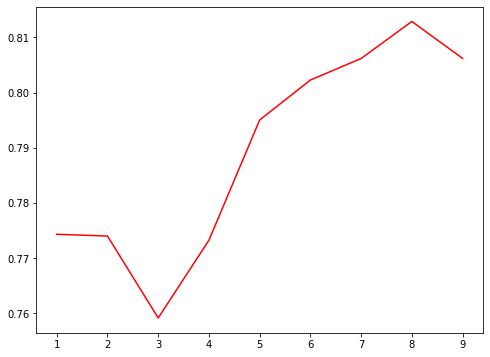

In [161]:
# Visualising the Linear Regression results
plt.plot(poly_orders, score, color = 'red')
plt.show()